In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv('datasets/wine_quality_red.csv')
df['quality_label']=df['quality'].apply(lambda x: 'low' if x<=5 else 'medium' if x<=7 else 'high')

In [94]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [95]:
df.quality_label.value_counts()

medium    837
low       744
high       18
Name: quality_label, dtype: int64

In [84]:
attributes = df.columns[:-2]


In [85]:
tukey_results = {}
for attribute in attributes:
    tukey_results[attribute]=pairwise_tukeyhsd(df[attribute],df['quality_label'],0.05)

In [5]:
tukey_results['volatile acidity'].summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,0.1662,0.001,0.0713,0.2611,True
high,medium,0.0519,0.4056,-0.0429,0.1467,False
low,medium,-0.1143,0.001,-0.1343,-0.0942,True


In [6]:
import re
l = str(tukey_results['volatile acidity'].summary()).split('\n')

In [7]:
l

['Multiple Comparison of Means - Tukey HSD, FWER=0.05 ',
 '====================================================',
 'group1 group2 meandiff p-adj   lower   upper  reject',
 '----------------------------------------------------',
 '  high    low   0.1662  0.001  0.0713  0.2611   True',
 '  high medium   0.0519 0.4056 -0.0429  0.1467  False',
 '   low medium  -0.1143  0.001 -0.1343 -0.0942   True',
 '----------------------------------------------------']

In [8]:
help('re.sub')

Help on function sub in re:

re.sub = sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the Match object and must return
    a replacement string to be used.



In [9]:
import re
results = []
for key,result in tukey_results.items():
    l = str(result.summary()).split('\n')
    st = '<style>table:{    padding: 25px;}td, caption{    padding: 15px;}</style>'
    title = f'# Pairwise analysis for {key}'


In [10]:
for key, result in tukey_results.items():
    print('\n\n',key,'\n',result.summary(),sep = '\n')




fixed acidity


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  high    low  -0.4245 0.5567 -1.3949  0.546  False
  high medium  -0.0946    0.9 -1.0638 0.8746  False
   low medium   0.3298  0.001  0.1248 0.5348   True
---------------------------------------------------



volatile acidity


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  high    low   0.1662  0.001  0.0713  0.2611   True
  high medium   0.0519 0.4056 -0.0429  0.1467  False
   low medium  -0.1143  0.001 -0.1343 -0.0942   True
----------------------------------------------------



citric acid


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  high    low  -0.1534 0.0024 -0.2609 -0.0458   

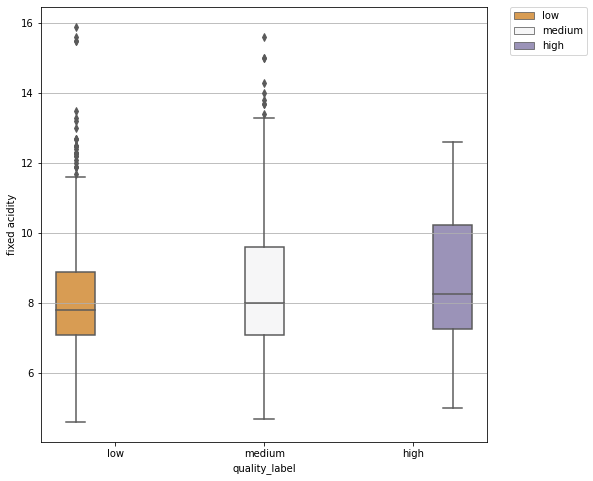

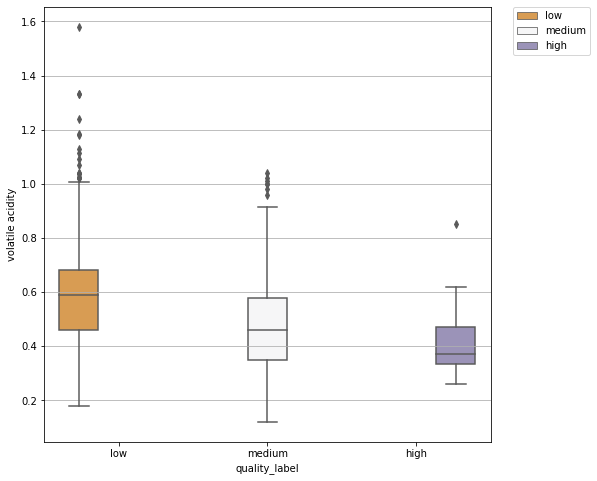

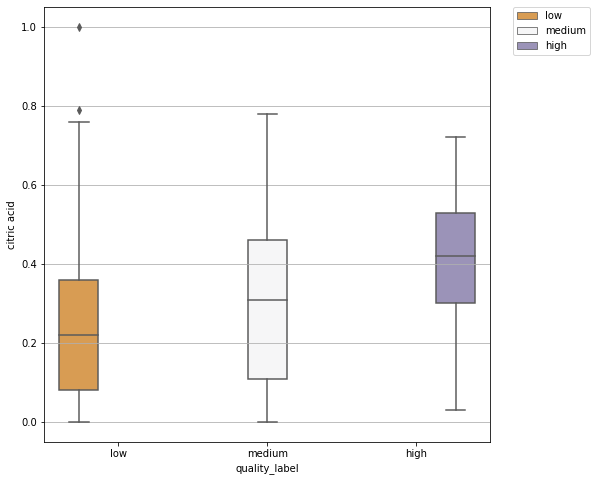

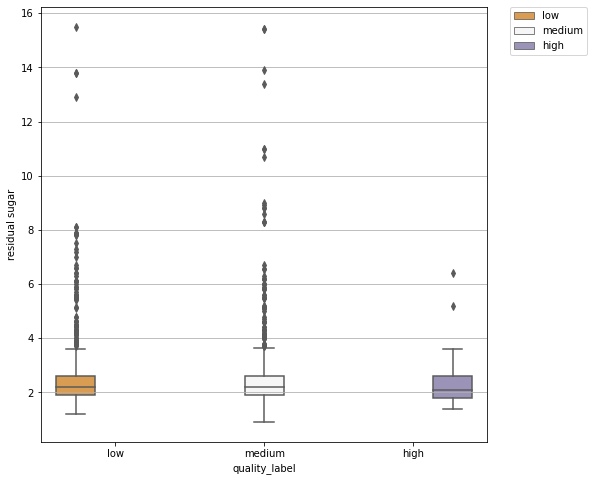

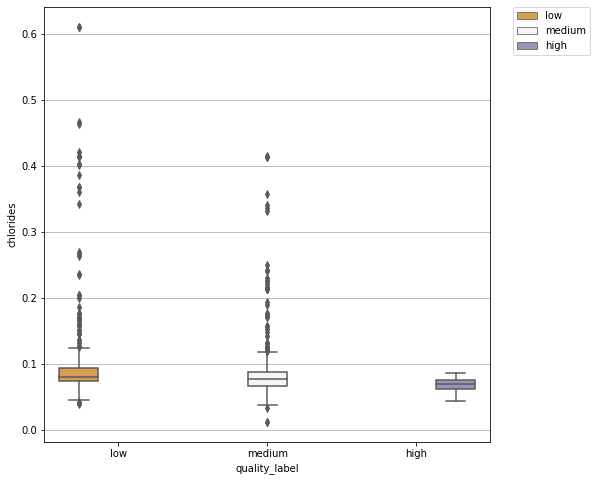

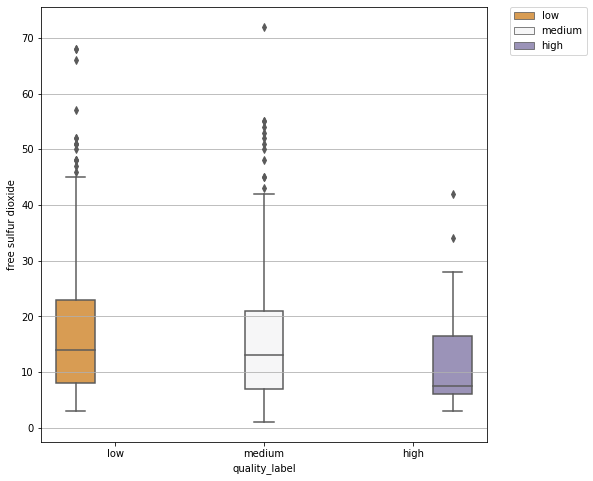

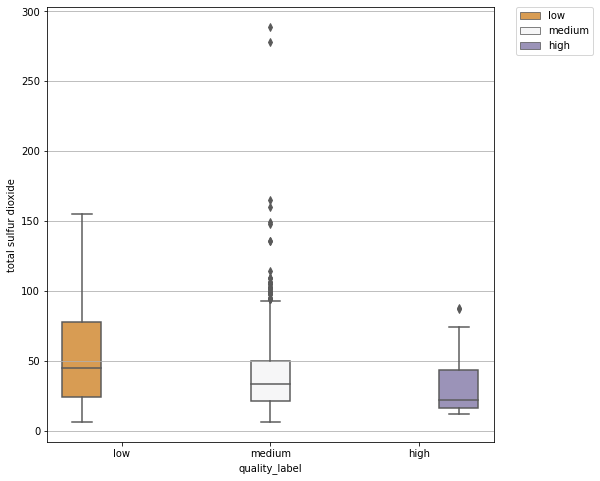

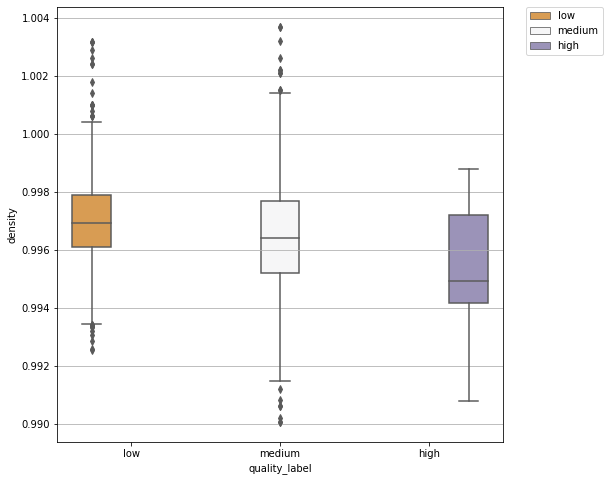

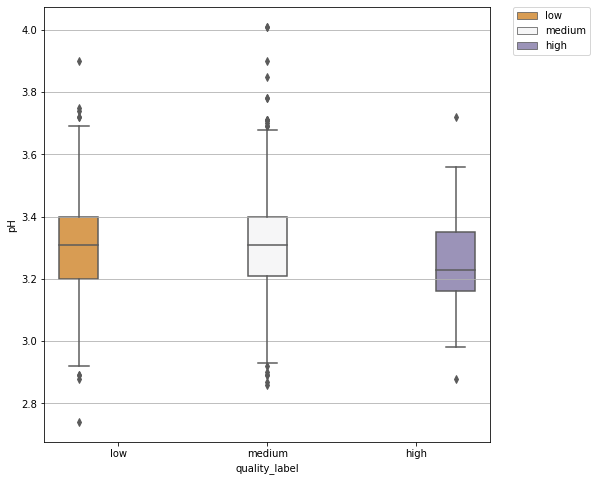

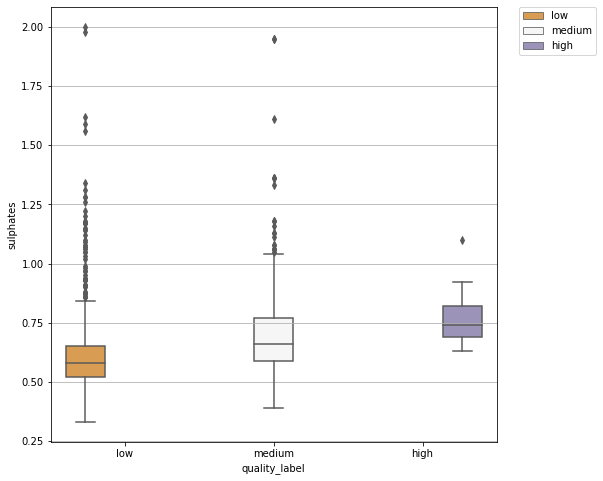

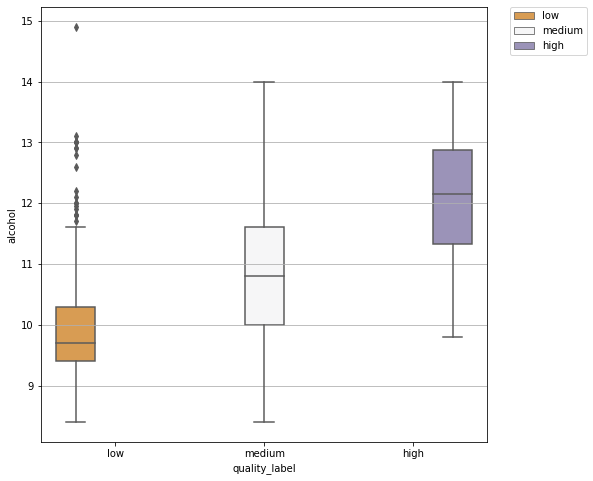

In [86]:
for ind,feature in enumerate(attributes):
    fig, ax = plt.subplots(nrows=1, ncols = 1,figsize = (8,8))
    fig.patch.set_facecolor('white')
    sns.boxplot(data = df,x='quality_label',y=f'{feature}', hue='quality_label',palette = 'PuOr', ax = ax)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.grid(b=True, which='both', axis='y')
    # plt.savefig(f'plots/{feature}_by_quality_label.png')

In [12]:
df.quality_label.value_counts()

medium    837
low       744
high       18
Name: quality_label, dtype: int64

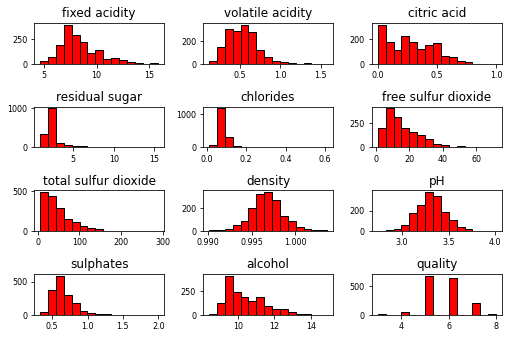

In [13]:
df.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

<AxesSubplot:>

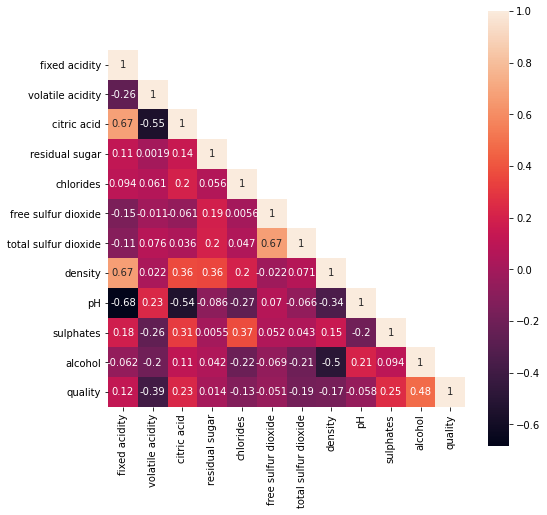

In [14]:
cor_mat = df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(8,8)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [88]:
label_quality = LabelEncoder()

In [96]:
df['quality_label']=label_quality.fit_transform(df.quality_label)

In [91]:
df.quality_label.value_counts()

2    837
1    744
0     18
Name: quality_label, dtype: int64

In [20]:
X = df.drop(['quality', 'quality_label'], axis = 1)
Y=df.quality_label

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()


In [134]:
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df)
X=df_scaled[:,:11]
Y=df['quality_label'].to_numpy()
X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [23]:
X_train

array([[ 0.21852997,  0.90601191,  0.20039205, ...,  1.09426457,
         0.48302886,  1.10483337],
       [-1.27524919, -1.77549685,  0.66254621, ..., -0.39596939,
        -0.40216729,  1.38643512],
       [ 1.48249695, -0.76993107,  1.02199944, ..., -0.07200549,
         0.54204194, -0.58477711],
       ...,
       [-0.6432657 ,  0.51495855, -1.08336951, ...,  1.28864292,
        -0.69723268, -0.86637886],
       [-0.24109439, -1.83136161,  0.4057939 , ...,  0.05758008,
         0.83710732,  1.38643512],
       [-1.44760832, -1.32857872, -0.05636026, ...,  0.51112954,
        -0.69723268,  2.8883111 ]])

In [24]:
models = [RandomForestClassifier(),LogisticRegression(), LinearSVC(),SVC(),KNeighborsClassifier()]


# Logistic Regression

In [25]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict, scoring='accuracy', cv=10)
clf_lr.fit(X_train, y_train)

/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-5/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-5/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-5/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-5/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs sup

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [26]:
clf_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [27]:
clf_lr.best_score_

0.7357529527559056

In [28]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(X_train,y_train)



GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [29]:
print(clf_knn.best_params_,clf_knn.best_score_)

{'n_jobs': -1, 'n_neighbors': 12} 0.7365342027559055


In [30]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [31]:
print(clf.best_params_,clf.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 0.7631520669291338


In [32]:
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5],
                         'gamma': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [33]:
print(clf_svm.best_params_,clf_svm.best_score_)

{'C': 1.2, 'gamma': 0.92, 'kernel': 'rbf'} 0.7623462106299213


In [62]:
params_dict={'n_estimators':[50,100,500,1000],'criterion':['gini','entropy'],'class_weight':['balanced','balanced subsample'],'random_state':[None,42],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(X_train,y_train)

/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-5/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-5/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-5/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-5/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 582, in _validate_y_class_weight
    raise ValueError('Valid presets for class_weight include '
ValueError: Valid presets for class_weight

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'class_weight': ['balanced', 'balanced subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 500, 1000],
                         'random_state': [None, 42]},
             scoring='accuracy')

In [35]:
print(clf_rf.best_params_,clf_rf.best_score_)

{'max_features': 'auto', 'n_estimators': 500} 0.8170890748031496


In [44]:
clf_rf.estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
print(clf_rf.best_params_,clf_rf.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 1000, 'random_state': None} 0.8163078248031497


In [79]:
red_rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features='auto', n_estimators = 1000, random_state=42)
red_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=1000, random_state=42)

In [101]:
red_rf_predictions = red_rf.predict(X_test)

In [80]:
red_rf.score(X_test,y_test)

0.79375

In [107]:
pd.Series(y_test).value_counts()

2    174
1    141
0      5
dtype: int64

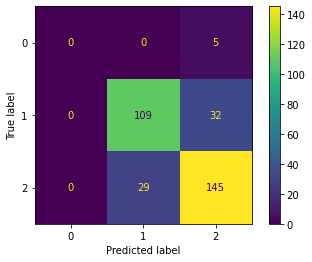

In [104]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(red_rf, X_test,y_test)


In [102]:
from sklearn.metrics import classification_report
labels=list(df.quality_label.unique())
print(classification_report(y_test,red_rf_predictions, labels=labels))


              precision    recall  f1-score   support

           1       0.79      0.77      0.78       141
           2       0.80      0.83      0.81       174
           0       0.00      0.00      0.00         5

    accuracy                           0.79       320
   macro avg       0.53      0.54      0.53       320
weighted avg       0.78      0.79      0.79       320

/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-5/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-5/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use 

* Observation: The model is failing to predict high quality wine
* Hypothesis_0: Under sampling will not increase predictions for high quality wine

In [108]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()


[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]] [1 1 1 ... 2 1 2]


In [121]:
X_under, y_under = undersampler.fit_resample(X,Y)


ValueError: too many values to unpack (expected 2)

In [ ]:
XU_train,XU_test,yu_train,yu_test = train_test_split(X_under,y_under, test_size=0.2, random_state=42)

In [119]:
print(pd.Series(y_under).value_counts())

0    18
1    18
2    18
dtype: int64


In [111]:
red_rf_u =  RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features='auto', n_estimators = 1000, random_state=42)
red_rf_u.fit(XU_train,yu_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=1000, random_state=42)

In [117]:
red_rf_u_predictions = red_rf_u.predict(X_test)


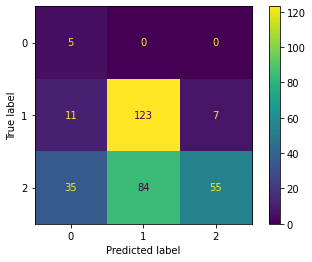

In [116]:
plot_confusion_matrix(red_rf_u, X_test,y_test)


In [118]:
print(classification_report(y_test,red_rf_u_predictions,labels=labels))

              precision    recall  f1-score   support

           1       0.59      0.87      0.71       141
           2       0.89      0.32      0.47       174
           0       0.10      1.00      0.18         5

    accuracy                           0.57       320
   macro avg       0.53      0.73      0.45       320
weighted avg       0.75      0.57      0.57       320



Observation: undersampling made the model biased towards high qualit wine
Hypothesis: Using undersampling on MinMax scaled data might remove biase

In [136]:
X_minmax = df.drop(['quality','quality_label'],inplace = False, axis = 1).to_numpy()
Y_minmax = df['quality_label'].to_numpy()

In [137]:
from sklearn.preprocessing import MinMaxScaler
XUM,yum = undersampler.fit_resample(X_minmax,Y_minmax)
minmax = MinMaxScaler()
XUM= minmax.fit_transform(XUM)

In [138]:
XUM_train,XUM_test,yum_train,yum_test = train_test_split(X_under,y_under, test_size=0.2, random_state=42)

In [139]:
red_rf_um =  RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features='auto', n_estimators = 1000, random_state=42)
red_rf_um.fit(XUM_train,yum_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=1000, random_state=42)

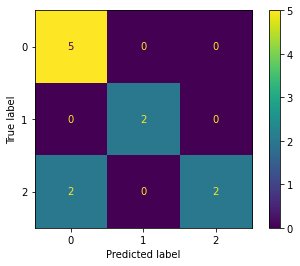

In [140]:
red_rf_um_predictions = red_rf_um.predict(X_test)
plot_confusion_matrix(red_rf_um, XUM_test,yum_test)


Observation: Using MinMax transformation did not change the model's sensitivity to high quality wine